<a href="https://colab.research.google.com/github/thiagorayam/Data/blob/master/Exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/thiagorayam/Data/master/Consumo_cerveja.csv",encoding = "ISO-8859-1", decimal=",")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [0]:
df=df.rename(columns={"Temperatura Media (C)": "Tmed", "Temperatura Minima (C)": "Tmin", "Temperatura Maxima (C)": "Tmax", "Consumo de cerveja (litros)":"Consumo"})

In [0]:
df.head()

,Data,Tmed,Tmin,Tmax,Precipitacao (mm),Final de Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


-> Definição dos tipos


In [4]:
df.dtypes

Data                  object
Tmed                 float64
Tmin                 float64
Tmax                 float64
Precipitacao (mm)    float64
Final de Semana      float64
Consumo               object
dtype: object

In [0]:
df['Data'] = df['Data'].astype('category')
df['Consumo'] = df['Consumo'].astype('float64')
df['Consumo']=df['Consumo']*1000 

In [0]:
df.shape

(941, 8)

-> Tratamento de dados ausentes

In [0]:
df.isnull().sum()

Data                 576
Tmed                 576
Tmin                 576
Tmax                 576
Precipitacao (mm)    576
Final de Semana      576
Consumo              576
dtype: int64

In [0]:
df.isnull()

,Data,Tmed,Tmin,Tmax,Precipitacao (mm),Final de Semana,Consumo
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
936,True,True,True,True,True,True,True
937,True,True,True,True,True,True,True
938,True,True,True,True,True,True,True
939,True,True,True,True,True,True,True


Como todos os valores nulos estão agrupados, podemos eliminar todas as instâncias com a função dropna

In [0]:
df=df.dropna()

In [0]:
df.isnull().sum()

Data                 0
Tmed                 0
Tmin                 0
Tmax                 0
Precipitacao (mm)    0
Final de Semana      0
Consumo              0
dtype: int64

-> Normalização

In [0]:

df['Precipitacao_norm'] = (df['Precipitacao (mm)'] - df['Precipitacao (mm)'].min()) / (df['Precipitacao (mm)'].max() - df['Precipitacao (mm)'].min())

In [0]:
df['Precipitacao_norm']

0      0.000000
1      0.000000
2      0.000000
3      0.012658
4      0.000000
         ...   
360    0.143460
361    0.000000
362    0.108650
363    0.066456
364    0.000000
Name: Precipitacao_norm, Length: 365, dtype: float64

In [0]:

df['Tmed_norm'] = (df['Tmed'] - df['Tmed'].min()) / (df['Tmed'].max() - df['Tmed'].min())

In [0]:
df['Tmed_norm']

0      0.902256
1      0.884712
2      0.746867
3      0.694236
4      0.684211
         ...   
360    0.695489
361    0.610276
362    0.550125
363    0.531328
364    0.743108
Name: Tmed_norm, Length: 365, dtype: float64

In [0]:
df['Clima']=df['Tmed_norm'] - df['Precipitacao_norm']

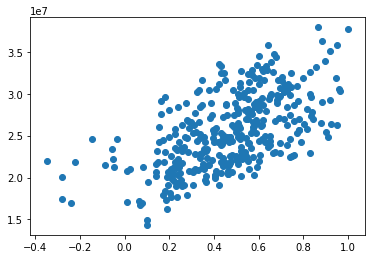

In [11]:
plt.scatter(x=df['Clima'],y=df['Consumo'])

In [13]:
df[df.duplicated()].sort_values("Clima").head()

,Data,Tmed,Tmin,Tmax,Precipitacao (mm),Final de Semana,Consumo,Precipitacao_norm,Tmed_norm,Clima


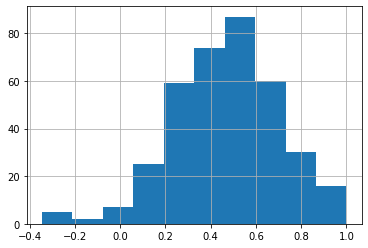

In [14]:
df['Clima'].hist()